In [1]:
import numpy as np
import sys, os
sys.path.append('../python')
from scipy.io import loadmat
from utils import utils


### 1. Load & visualize  surface data 

In [2]:
from nilearn import datasets
from nilearn.plotting.surf_plotting import load_surf_mesh

fs5 = datasets.fetch_surf_fsaverage(mesh ='fsaverage5')

# load mesh and derive axes limits
mesh_left  = load_surf_mesh(fs5['pial_left'])
mesh_right = load_surf_mesh(fs5['pial_left'])

coords_left, faces_left   = mesh_left[0], mesh_left[1]
coords_right, faces_right = mesh_right[0], mesh_right[1]

print(coords_left.shape, faces_left.shape)
print(coords_right.shape, faces_right.shape)



(10242, 3) (20480, 3)
(10242, 3) (20480, 3)


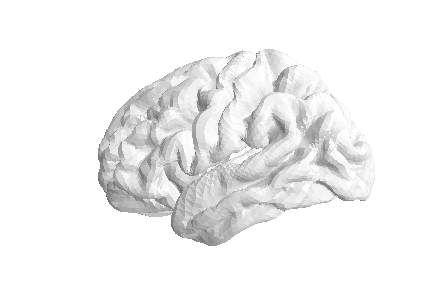

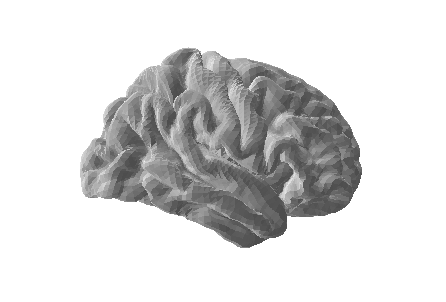

In [3]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_surf

figure1 = plot_surf(fs5['pial_left'], 
                   hemi='left', view='lateral')

figure2 = plot_surf(fs5['pial_right'], 
                   hemi='right', view='lateral')

### 2. Manual reading of surface data

In [4]:
from nibabel.freesurfer.io import read_geometry

SW_surf_L = read_geometry('fsaverage5/lh.white')
SW_surf_R = read_geometry('fsaverage5/rh.white')

SW = {}
SW['tri'] = np.concatenate((SW_surf_L[1]+1, 10242 + SW_surf_R[1]+1))
SW['coord'] = np.concatenate((SW_surf_L[0].T, SW_surf_R[0].T), axis=1)

print(SW['tri'].shape)
print(SW['coord'].shape)


(40960, 3)
(3, 20484)


### 3. Manual plotting of surface
### - mask
### - curvature

### 4. ready for some analysis: load the tutorial data

In [17]:
a = utils.fetch_tutorial_data(n_subjects = 259, 
                              data_dir = 'thickness')

In [436]:
#a

In [19]:
import nibabel.freesurfer.mghformat as mgh

T = np.zeros((259, 20484))

j = 0
for i in range(0,259):
  
    sub_T_data_L = mgh.load(a['image_files'][j]).get_fdata()
    sub_T_data_R = mgh.load(a['image_files'][j+1]).get_fdata()

    sub_T_arr_L = np.array(sub_T_data_L)
    sub_T_arr_R = np.array(sub_T_data_R)

    subj_T = np.concatenate((sub_T_arr_L[:,:,0], sub_T_arr_R[:,:,0])).T
    
    if j == 0:
        T = subj_T
    else:
        T = np.concatenate((T, subj_T), axis=0)
    
    j += 2

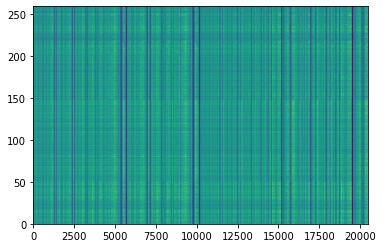

In [20]:
plt.imshow(T, extent=[0,20484,0,259], aspect='auto')

### plot mean thickness across brain surface

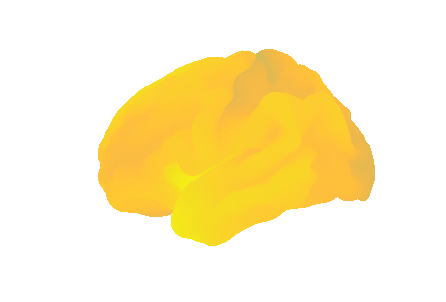

In [25]:
from nilearn.plotting import plot_surf_stat_map

figure = plot_surf_stat_map(fs5.pial_left, T.mean(axis=0)[0:10242],
                             hemi='left',
                             bg_map=fs5['sulc_left'],
                             cmap = parula_map,
                             colorbar=False,
                             #threshold=1,
                             cmin=1,
                             cmax=4)

### 5. Now, we can finally do a first models: effects of age

In [27]:
from SurfStatLinMod import py_SurfStatLinMod
from SurfStatT import py_SurfStatT
from term import Term

# first code some variables of interest
A = Term(a['demographics']['AGE'])

# then build a model
M = 1 + A

# estimate the model parameter slm

slm = py_SurfStatLinMod(T, M, SW); 

# specify the contrast
slm['df'] =np.array([slm['df']])
contrast = np.array(a['demographics']['AGE'])
contrast = contrast.reshape(len(contrast),1)

slm = py_SurfStatT(slm, contrast )

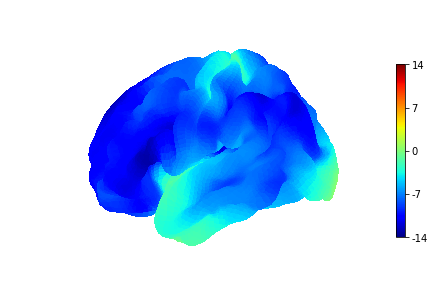

In [30]:
figure = plot_surf_stat_map(fs5.pial_left, slm['t'][0,0:10242],
                            hemi='left',
                            bg_map=fs5['sulc_left'],
                            cmap = 'jet',
                            threshold = None)

### define parula map

viscm not found, falling back on simple display


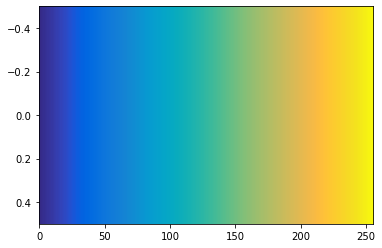

In [24]:

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

In [32]:
import os 
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nb 
from nibabel import gifti
import nipype.interfaces.freesurfer as fs
from nilearn._utils.compat import _basestring
from nilearn.plotting.img_plotting  import _get_colorbar_and_data_ranges
from nilearn.plotting.surf_plotting import load_surf_data
from nilearn.plotting.surf_plotting import load_surf_mesh
from nilearn import datasets
from nilearn import plotting
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [93]:
def plot_surf_only(fsaverage, 
                   surf_map_l,
                   surf_map_r, 
                   alpha = 0.7):

    # load mesh and derive axes limits
    mesh_left = load_surf_mesh(fs5['pial_left'])
    mesh_right = load_surf_mesh(fs5['pial_right'])

    coords_left, faces_left = mesh_left[0], mesh_left[1]
    coords_right, faces_right = mesh_right[0], mesh_right[1]

    limits = [-124, 50]

    avg_method = 'mean'
    darkness=0.65

    def subplot(surf_map, bg_map, subplot_id, coords, 
                faces, elev, azim):

        ax = fig.add_subplot(subplot_id, projection='3d',
                             xlim=limits, ylim=limits)
        #ax.set_axis_bgcolor('white')
        ax.view_init(elev=elev, azim=azim)
        ax.set_axis_off()
        p3dcollec = ax.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2],
                                    triangles=faces, linewidth=0.,
                                    antialiased=False)

        face_colors = np.ones((faces.shape[0], 4))

        bg_data = load_surf_data(bg_map)
        if bg_data.shape[0] != coords.shape[0]:
            raise ValueError('The bg_map does not have the same number '
                             'of vertices as the mesh.')
        bg_faces = np.mean(bg_data[faces], axis=1)
        bg_faces = bg_faces - bg_faces.min()
        bg_faces = bg_faces / bg_faces.max()
        
        #print bg_faces.min(), bg_faces.max(), bg_faces.mean()
        # control background darkness
        bg_faces *= darkness
        face_colors = plt.cm.gray_r(bg_faces)
        # modify alpha values of background
        face_colors[:, 3] = alpha * face_colors[:, 3]
        # should it be possible to modify alpha of surf data as well?
        p3dcollec.set_facecolors(face_colors)

    fig = plt.figure(figsize=(25,9))
    
    subplot(surf_map_l, fs5['sulc_left'], 121, 
            coords_left, faces_left, elev=0, azim=180)
    
    subplot(surf_map_r, fs5['sulc_right'], 122, 
            coords_right, faces_right, elev=0, azim=0)

    return fig

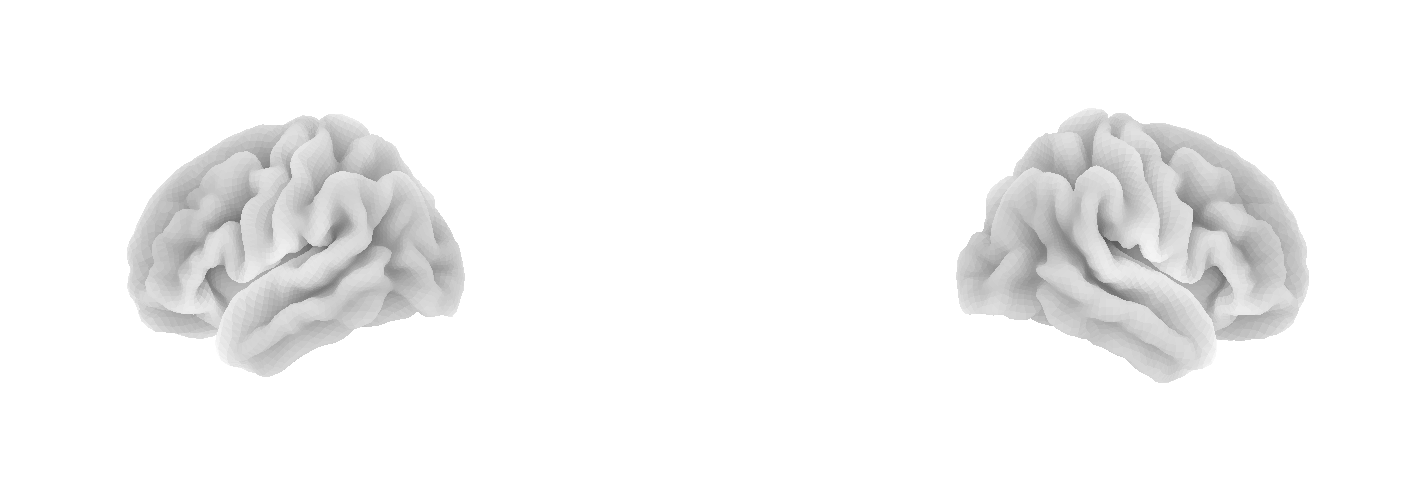

In [94]:
figure = plot_surf_only(fs5, T.mean(axis=0)[0:10242], T.mean(axis=0)[10242:], alpha = 1)

In [80]:


def plot_surf_data(fsaverage, 
                   fsize,
                   surf_map_l=None, 
                   surf_map_r=None,
                   vmin = None,
                   vmax = None,
                   threshold = None,
                   alpha = 0.7,
                   cmap = 'hot',
                   mask_lh=None,
                   mask_rh=None,):

    # load mesh and derive axes limits
    mesh_left  = load_surf_mesh(fs5['pial_left'])
    mesh_right = load_surf_mesh(fs5['pial_right'])

    coords_left, faces_left   = mesh_left[0], mesh_left[1]
    coords_right, faces_right = mesh_right[0], mesh_right[1]

    #limits =  [-150, 50]
    limits = [-100, 50]
    
    avg_method = 'mean'
    darkness   = 0.3
    
    # if no cmap is given, set to matplotlib default
    if cmap is None:
        cmap = plt.cm.get_cmap(plt.rcParamsDefault['image.cmap'])
    else:
        # if cmap is given as string, translate to matplotlib cmap
        if isinstance(cmap, _basestring):
            cmap = plt.cm.get_cmap(cmap)

    def subplot(surf_map, bg_map, subplot_id, coords, faces, 
                elev, azim, vmin = vmin, vmax = vmax,
                mask=None, mask_lenient=None):

        bg_on_data=False
        
        fig.subplots_adjust(wspace=0, hspace=0)
        
        ax = fig.add_subplot(subplot_id, projection='3d', xlim=limits, ylim=limits)
        #ax.set_axis_bgcolor('white')
        ax.view_init(elev=elev, azim=azim)
        ax.set_axis_off()
        p3dcollec = ax.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2],
                                    triangles=faces, linewidth=0.,
                                    antialiased=False, color='red')
        if mask is not None:    
            cmask = np.zeros(len(coords))
            cmask[mask] = 1
            cutoff = 2 
            if mask_lenient: 
                cutoff = 0
            fmask = np.where(cmask[faces].sum(axis=1) > cutoff)[0]

        if bg_map is not None or surf_map is not None:

            face_colors = np.ones((faces.shape[0], 4))
   
            if bg_map is not None:
                bg_data = load_surf_data(bg_map)
                if bg_data.shape[0] != coords.shape[0]:
                    raise ValueError('The bg_map does not have the same number '
                                     'of vertices as the mesh.')
                bg_faces = np.mean(bg_data[faces], axis=1)
                bg_faces = bg_faces - bg_faces.min()
                bg_faces = bg_faces / bg_faces.max()
                # control background darkness
                bg_faces *= darkness
                face_colors = plt.cm.gray_r(bg_faces)

            # modify alpha values of background
            face_colors[:, 3] = alpha * face_colors[:, 3]

            if surf_map is not None:
                surf_map_data = surf_map
                if len(surf_map_data.shape) is not 1:
                    raise ValueError('surf_map can only have one dimension but has'
                                     '%i dimensions' % len(surf_map_data.shape))
                if surf_map_data.shape[0] != coords.shape[0]:
                    raise ValueError('The surf_map does not have the same number '
                                     'of vertices as the mesh.')

                # create face values from vertex values by selected avg methods
                if avg_method   == 'mean':
                    surf_map_faces = np.mean(surf_map_data[faces], axis=1)
                elif avg_method == 'median':
                    surf_map_faces = np.median(surf_map_data[faces], axis=1)

                # if no vmin/vmax are passed figure them out from data
                if vmin is None:
                    vmin = np.nanmin(surf_map_faces)
                if vmax is None:
                    vmax = np.nanmax(surf_map_faces)

                # treshold if inidcated
                if threshold is None:
                    kept_indices = np.where(surf_map_faces)[0]
                else:
                    kept_indices = np.where(np.abs(surf_map_faces) >= threshold)[0]

                surf_map_faces = surf_map_faces - vmin
                surf_map_faces = surf_map_faces / (vmax - vmin)

                # multiply data with background if indicated
                if bg_on_data:
                    face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])\
                        * face_colors[kept_indices]
                else:
                    if mask is None:
                        face_colors[kept_indices] = cmap(surf_map_faces[kept_indices])
                    else:
                        face_colors[fmask] = cmap(surf_map_faces)[fmask] * face_colors[fmask]

            p3dcollec.set_facecolors(face_colors)

    fig = plt.figure(figsize=fsize)
    
    subplot(surf_map_l, fsaverage['sulc_left'], 141, coords_left,  
            faces_left, elev=0, azim=180, mask=mask_lh)

    subplot(surf_map_l, fsaverage['sulc_left'], 142, coords_left,  
            faces_left, elev=0, azim=0, mask=mask_lh)

    subplot(surf_map_r, fsaverage['sulc_right'], 143, coords_right,  
            faces_right, elev=0, azim=180, mask=mask_rh)
    
    subplot(surf_map_r, fsaverage['sulc_right'], 144, coords_right,  
            faces_right, elev=0, azim=0, mask=mask_rh)

    return fig



In [78]:
cort_lh = nb.freesurfer.io.read_label('/afs/cbs.mpg.de/software/freesurfer/6.0.0/ubuntu-xenial-amd64/subjects/fsaverage5/label/lh.cortex.label')
cort_rh = nb.freesurfer.io.read_label('/afs/cbs.mpg.de/software/freesurfer/6.0.0/ubuntu-xenial-amd64/subjects/fsaverage5/label/rh.cortex.label')

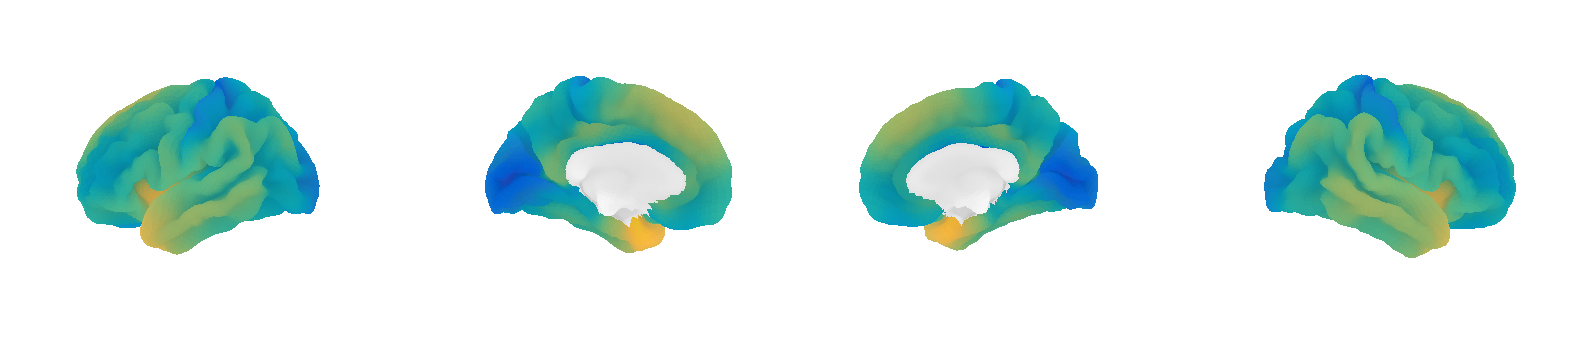

In [81]:
my_min = 1.5
my_max = 4

figure = plot_surf_data(fs5, 
                        fsize=(28, 6),
                        surf_map_l = T.mean(axis=0)[0:10242], 
                        surf_map_r = T.mean(axis=0)[10242:],
                        vmin = my_min,
                        vmax = my_max,
                        threshold = None,
                        alpha = 1.,
                        cmap = parula_map,
                        mask_lh = cort_lh,
                        mask_rh = cort_rh)

In [82]:
from SurfStatLinMod import py_SurfStatLinMod
from SurfStatT import py_SurfStatT
from term import Term

# first code some variables of interest
A = Term(a['demographics']['AGE'])

# then build a model
M = 1 + A

# estimate the model parameter slm

slm = py_SurfStatLinMod(T, M, SW); 

# specify the contrast
slm['df'] =np.array([slm['df']])
contrast = np.array(a['demographics']['AGE'])
contrast = contrast.reshape(len(contrast),1)

slm = py_SurfStatT(slm, contrast )

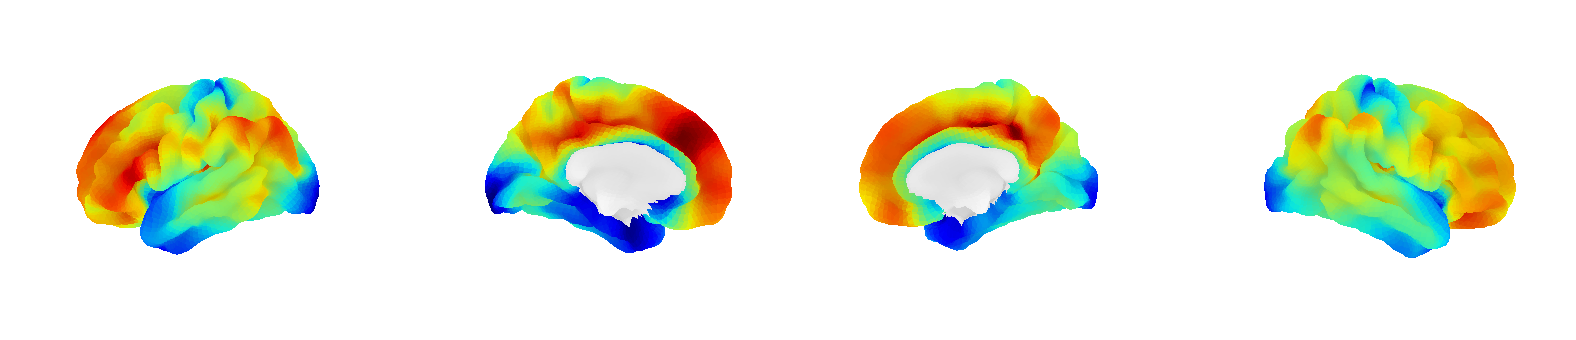

In [89]:

figure = plot_surf_data(fs5, 
                        fsize=(28, 6),
                        surf_map_l = -1*slm['t'][0,0:10242], 
                        surf_map_r = -1*slm['t'][0,10242:],
                        #vmin = my_min,
                        #vmax = my_max,
                        threshold = None,
                        alpha = 1.,
                        cmap = 'jet',
                        mask_lh = cort_lh,
                        mask_rh = cort_rh)

In [90]:
slm['t'].min(), slm['t'].max()

(-13.932338220642313, 1.9378904840603615)